# Project - Cutomer Churn Prediction

### Problem Statement:
The TELCO firm is interested in developing a predictive model of churn (customer attrition).

### Task:
Build classification models to predict which customer is likely to churn.

## Step-1 :  Reading file and getting familiar with data

## 1.1 Imports

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

## 1.2 Reading file

In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\Assingment\Churn1.csv")

In [3]:
df_new = df.copy()

## 1.3 checking data shape (row and column count).

In [4]:
df.shape

(1000, 31)

In [5]:
df.head()

,Customer ID,tenure,age,marital,address,income,ed,employ,retire,gender,...,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat,churn
0,CS01,13,44,1,9,64,4,5,0,0,...,0,0,0,0,0,1,0,0,1,1
1,CS02,11,33,1,7,136,5,5,0,0,...,1,1,0,1,1,1,1,0,4,1
2,CS03,68,52,1,24,116,1,29,0,1,...,0,0,0,1,1,0,1,0,3,0
3,CS04,33,33,0,12,33,2,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,CS05,23,30,1,9,30,1,2,0,0,...,0,0,0,1,0,1,1,0,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  1000 non-null   object 
 1   tenure       1000 non-null   int64  
 2   age          1000 non-null   int64  
 3   marital      1000 non-null   int64  
 4   address      1000 non-null   int64  
 5   income       1000 non-null   int64  
 6   ed           1000 non-null   int64  
 7   employ       1000 non-null   int64  
 8   retire       1000 non-null   int64  
 9   gender       1000 non-null   int64  
 10  reside       1000 non-null   int64  
 11  tollfree     1000 non-null   int64  
 12  equip        1000 non-null   int64  
 13  callcard     1000 non-null   int64  
 14  wireless     1000 non-null   int64  
 15  longmon      1000 non-null   float64
 16  tollmon      1000 non-null   float64
 17  equipmon     1000 non-null   float64
 18  cardmon      1000 non-null   float64
 19  wiremon

In [7]:
df.columns

Index(['Customer ID', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'ebill', 'custcat', 'churn'],
      dtype='object')

## 1.4  Check for Null or missing values

In [8]:
df.isnull().sum()  #...No null/missing values in dataset

Customer ID    0
tenure         0
age            0
marital        0
address        0
income         0
ed             0
employ         0
retire         0
gender         0
reside         0
tollfree       0
equip          0
callcard       0
wireless       0
longmon        0
tollmon        0
equipmon       0
cardmon        0
wiremon        0
multline       0
voice          0
pager          0
internet       0
callid         0
callwait       0
forward        0
confer         0
ebill          0
custcat        0
churn          0
dtype: int64

# Step -2 :  Exploratory Data Analysis (EDA) 

## 2.1 Check for distribution of target variable (Churn column) 

Text(0.93, 200, '726')

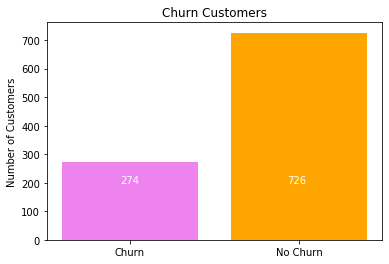

In [9]:
#sns.countplot(df['churn'])#..we have use here countplot function from seaborn library

x_variables = ['Churn', 'No Churn']
y_variables = [df.churn[df.churn == 1].count(), df.churn[df.churn == 0].count()]
barChar = plt.bar(x_variables,y_variables, color=['violet','orange'])

#Set descriptions:
plt.ylabel('Number of Customers')
plt.title('Churn Customers')
#Display values:
plt.text(-0.06, 200,df.churn[df.churn == 1].count(), fontsize=10, color= 'White')
plt.text(0.93, 200, df.churn[df.churn == 0].count(), fontsize=10, color= 'White')

 From above countplot now we know that there is class imbalnce for churnout and non-churnout customer

## 2.2 check for columns conatining single  unique category

In [10]:
df.nunique().sort_values(ascending=True).reset_index(name= "Column unique count")

,index,Column unique count
0,churn,2
1,forward,2
2,callwait,2
3,callid,2
4,internet,2
5,pager,2
6,voice,2
7,multline,2
8,confer,2
9,callcard,2


## 2.3 Check for how age and churn related

In [11]:
df.groupby(["churn"]).age.mean()

churn
0    43.633609
1    36.518248
Name: age, dtype: float64

In [12]:
attri_yes = df.loc[df["churn"]==1]
attri_no = df.loc[df["churn"]==0]

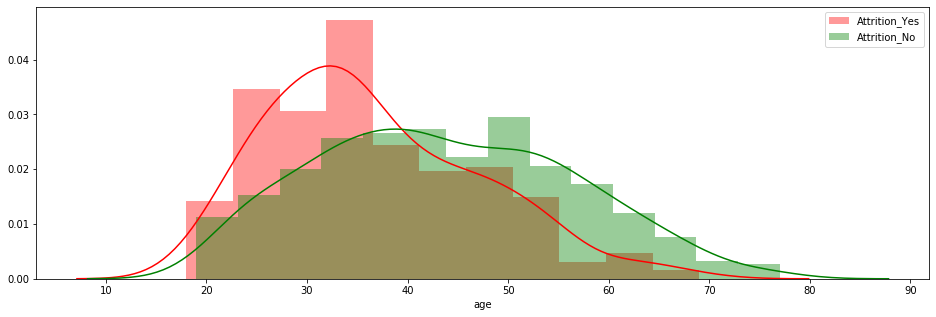

In [13]:
plt.figure(figsize=(16,5))
sns.distplot(attri_yes["age"],color="red",label= "Attrition_Yes")
sns.distplot(attri_no["age"], color="green", label= "Attrition_No")
plt.legend()

Customer whose age is in between 30 to 35 has high attrition rate

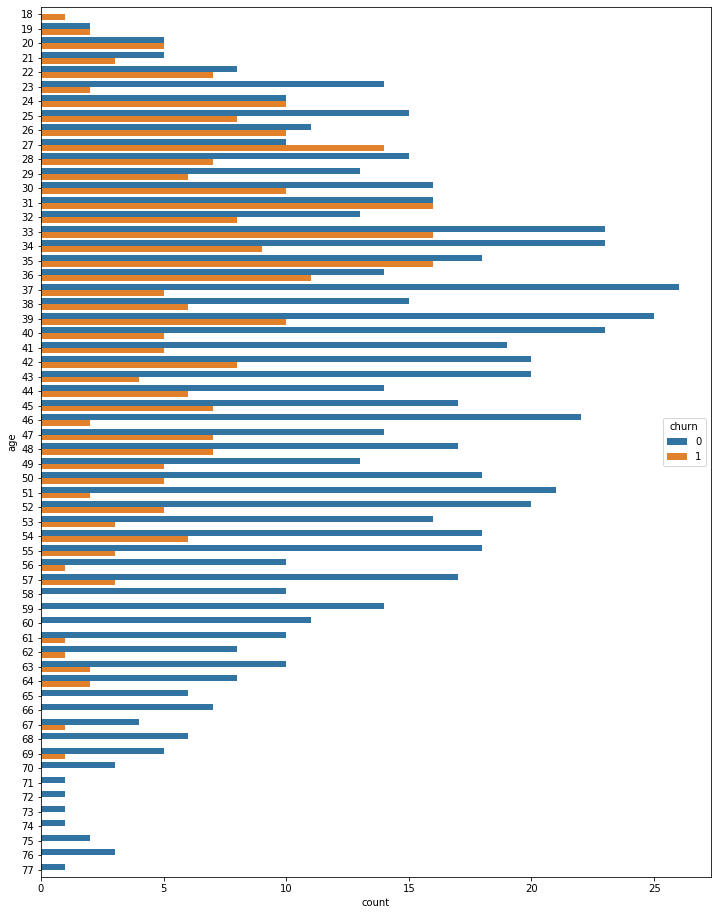

In [14]:
# Churn rate with each age group.
plt.figure(figsize=(12,16))
sns.countplot(y="age", hue="churn", data=df)

#### INSIGHT : From above visualization we can say customer having age below 35 years has more churn rate

## 2.4 How Churn is related with Marital Status

In [15]:
df.marital.value_counts()

0    505
1    495
Name: marital, dtype: int64

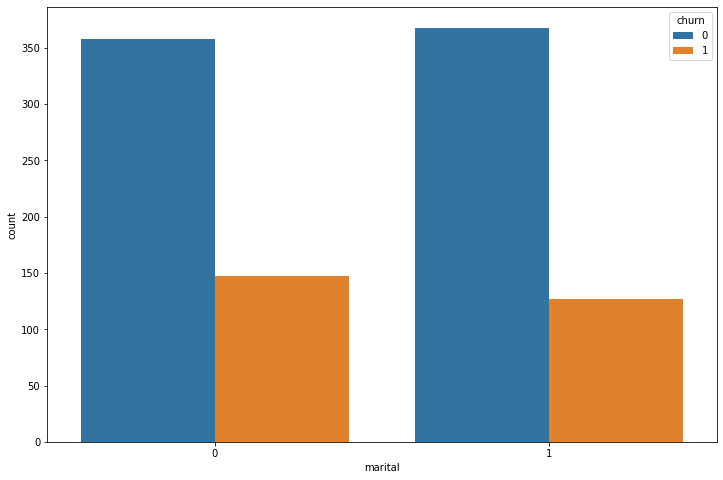

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x="marital", hue="churn", data=df)

#Set descriptions:
#plt.ylabel('Amount of Customers')
#plt.title('Churn Customers')


# 0 for unmarried and 1 for married

#### INSIGHT : There is almost same pattern of Marital in churnout and nonchurnout customers .                                                                           Hence this feature has minimal impact on prediction.


## 2.5 Relation between Income and churn

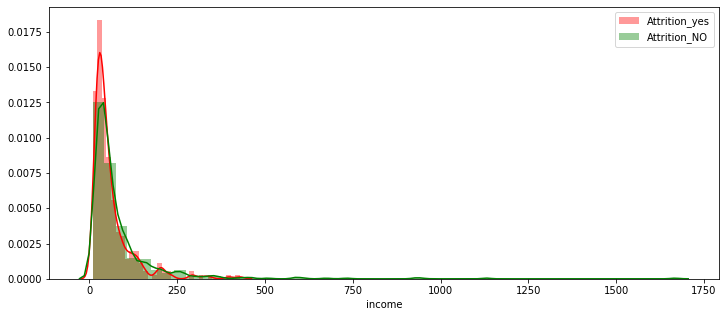

In [17]:
plt.figure(figsize=(12,5))
sns.distplot(attri_yes["income"],color="red",label= "Attrition_yes")
sns.distplot(attri_no["income"], color="green", label= "Attrition_NO")
plt.legend()

#### INSIGHT : For higher income group have more chances to churn

# 2.6 Education wise who is leaving more

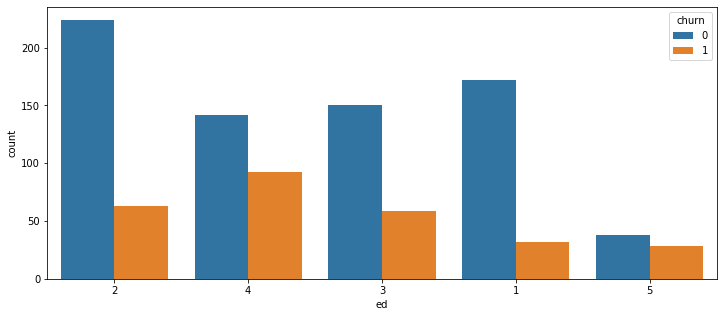

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(x="ed", hue="churn", data=df, order = df["ed"].value_counts().index)

####        Education (1=Did not complete high schooll; 2= High school degree or GED; 3=Some college; 4=College degree; 5=Post UG degree).

#### INSIGHT  
#### The person who has not complete high school or completed high school have low rate of churn
#### Highly educated person has high chances of leaving the company

## 2.7 Employee duration and churn

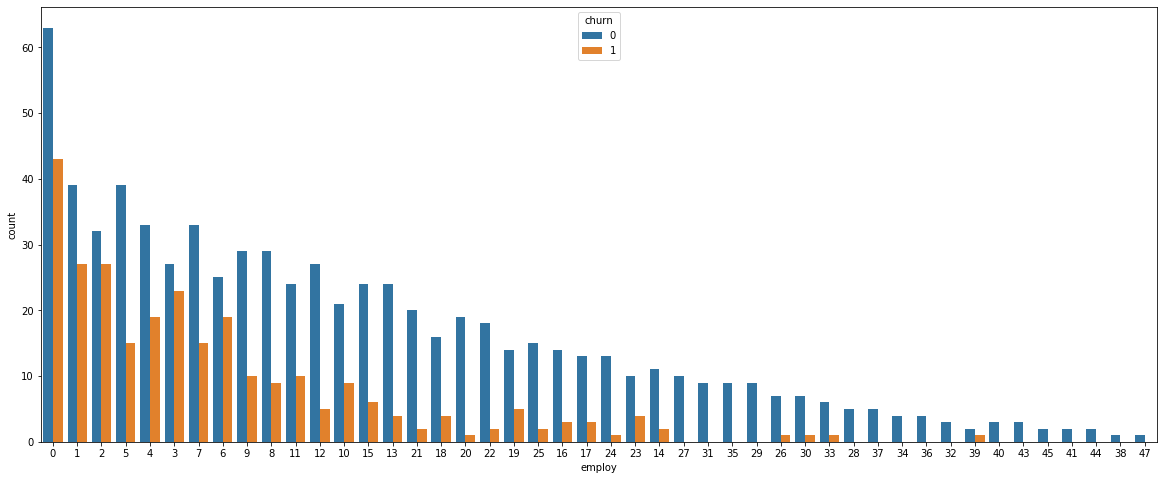

In [19]:
plt.figure(figsize=(20,8))
sns.countplot(x="employ", hue="churn", data=df, order = df["employ"].value_counts().index)

### If employee is working with same employer for long time than he has less chances to get churn

## 2.8 Gender and Attrition

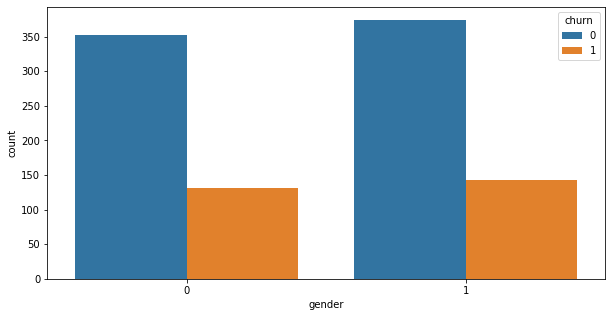

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x="gender", hue="churn", data=df)

# 0 for male and  1 for female

## 2.9 Retired person and churn

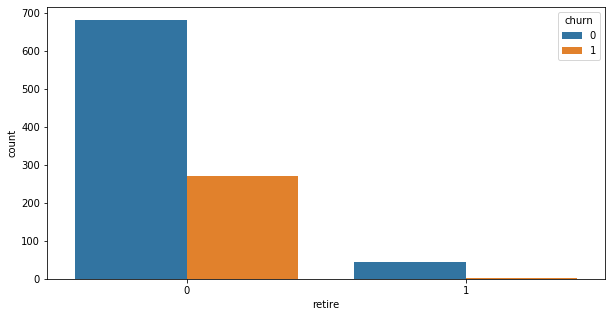

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x="retire", hue="churn", data=df)

# 0 for working and  1 for retired

### INSIGHT : Retired person has less churn rate

## 2.10 Custcat with Churn

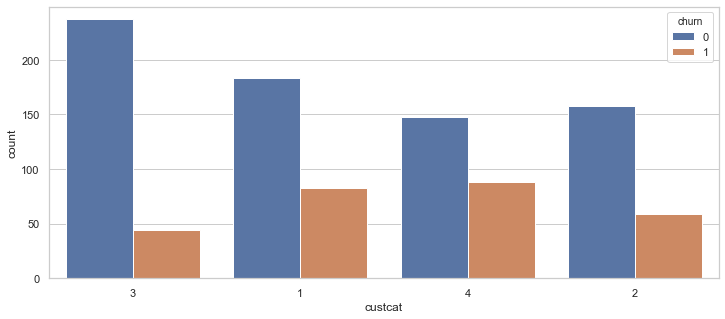

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,5))
sns.countplot(x="custcat", hue="churn", data=df, order = df["custcat"].value_counts().index)

#### Customer category : 1=basic service; 2= e-service; 3=plus service; 4=total service


#### INSIGHT : Customer with total service has highest churn rate.

## 2.11 Internet service with churn

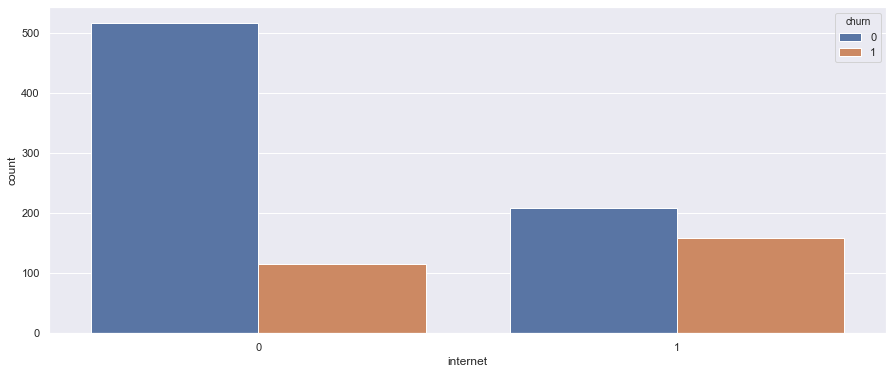

In [23]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,6))
sns.countplot(x="internet", hue="churn", data=df)

#### Internet service 0 for No and 1 for Yes

####  INSIGHT : There is high churn rate for customer using internte services. 

## 2.12 Paging service with churn.

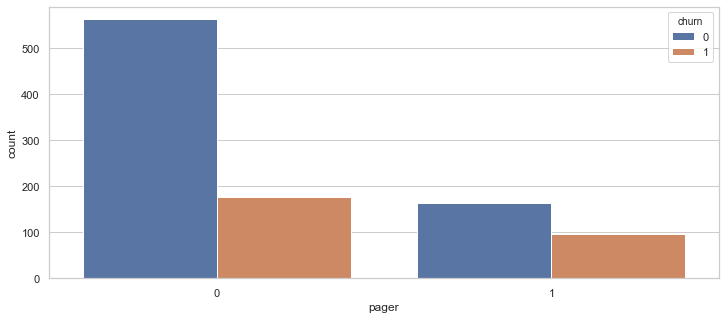

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,5))
sns.countplot(x="pager", hue="churn", data=df)

#### Paging service 0 for not adopted and 1 for adopted

#### INSIGHT :Customers who adopted for paging service has high churn rate 

# Step-3 : Summary of Important Insights 

### 3.1 Provided data has class imblance for target variable.

### 3.2 Features related to High attrition rate

1) Customers below 35 years of age has more churn rate.

2) Customer having high income has high churn rate.

3) Customer with higher education has high churn rate.

4) Employee whose has spend less than 9 year with same employer has high churn rate.

5) Working proffesional has high churn rate

6) Customer with total service has high churn rate.

7) Customer who use internet service has high churn rate.

8) Customer who adopted for paging service has high churn rate.

### 3.3 Features related to Low attrition rate

1.Customer gender has no impact with churn rate

2.Customer marital status no impact with churn rate.

3.Multilinr has no relationship with churn rate.

###  Identification of Highly correlated Features

In [25]:
df_corr=df.corr()
df_corr

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat,churn
tenure,1.000000,0.490217,0.154171,0.522952,0.242912,-0.109797,0.520288,0.171143,0.023533,-0.036592,...,-0.005591,-0.020721,-0.140888,0.058311,0.086777,0.085884,0.133585,-0.157095,0.166691,-0.376828
age,0.490217,1.000000,-0.014433,0.660435,0.327948,-0.154857,0.670047,0.429440,-0.011419,-0.254993,...,-0.032376,-0.054876,-0.141025,0.080998,0.073685,0.080595,0.121193,-0.144425,0.056909,-0.252819
marital,0.154171,-0.014433,1.000000,-0.012051,-0.043984,0.001400,-0.002891,-0.078109,0.008345,0.625999,...,0.019654,0.044654,0.024220,0.035648,0.023712,0.043866,0.006040,-0.056495,0.083836,-0.038701
address,0.522952,0.660435,-0.012051,1.000000,0.226781,-0.128330,0.463291,0.292503,0.008363,-0.201645,...,-0.053372,-0.055969,-0.131174,0.032155,0.059891,0.078042,0.087962,-0.131088,0.067913,-0.243072
income,0.242912,0.327948,-0.043984,0.226781,1.000000,0.113939,0.516349,-0.083651,0.038706,-0.097591,...,0.131332,0.112121,-0.009436,0.156401,0.135933,0.117148,0.138563,-0.034062,0.134525,-0.091339
ed,-0.109797,-0.154857,0.001400,-0.128330,0.113939,1.000000,-0.228580,-0.114229,0.006704,0.021045,...,0.309637,0.301666,0.460052,0.031532,0.014027,0.029790,0.016628,0.405040,0.193864,0.203965
employ,0.520288,0.670047,-0.002891,0.463291,0.516349,-0.228580,1.000000,0.277401,0.046016,-0.134683,...,-0.031077,-0.015728,-0.198614,0.143053,0.152555,0.115801,0.168608,-0.182043,0.110011,-0.274213
retire,0.171143,0.429440,-0.078109,0.292503,-0.083651,-0.114229,0.277401,1.000000,0.053906,-0.140120,...,-0.054319,-0.056666,-0.120472,0.032087,0.049210,0.036188,0.060538,-0.082524,0.008908,-0.104648
gender,0.023533,-0.011419,0.008345,0.008363,0.038706,0.006704,0.046016,0.053906,1.000000,0.016556,...,0.016671,-0.031609,0.019685,0.001294,-0.031012,-0.035548,-0.002137,-0.015771,-0.004966,0.006021
reside,-0.036592,-0.254993,0.625999,-0.201645,-0.097591,0.021045,-0.134683,-0.140120,0.016556,1.000000,...,0.068740,0.064433,0.034955,0.034572,0.041083,0.042953,-0.005800,0.000287,0.082022,0.009852


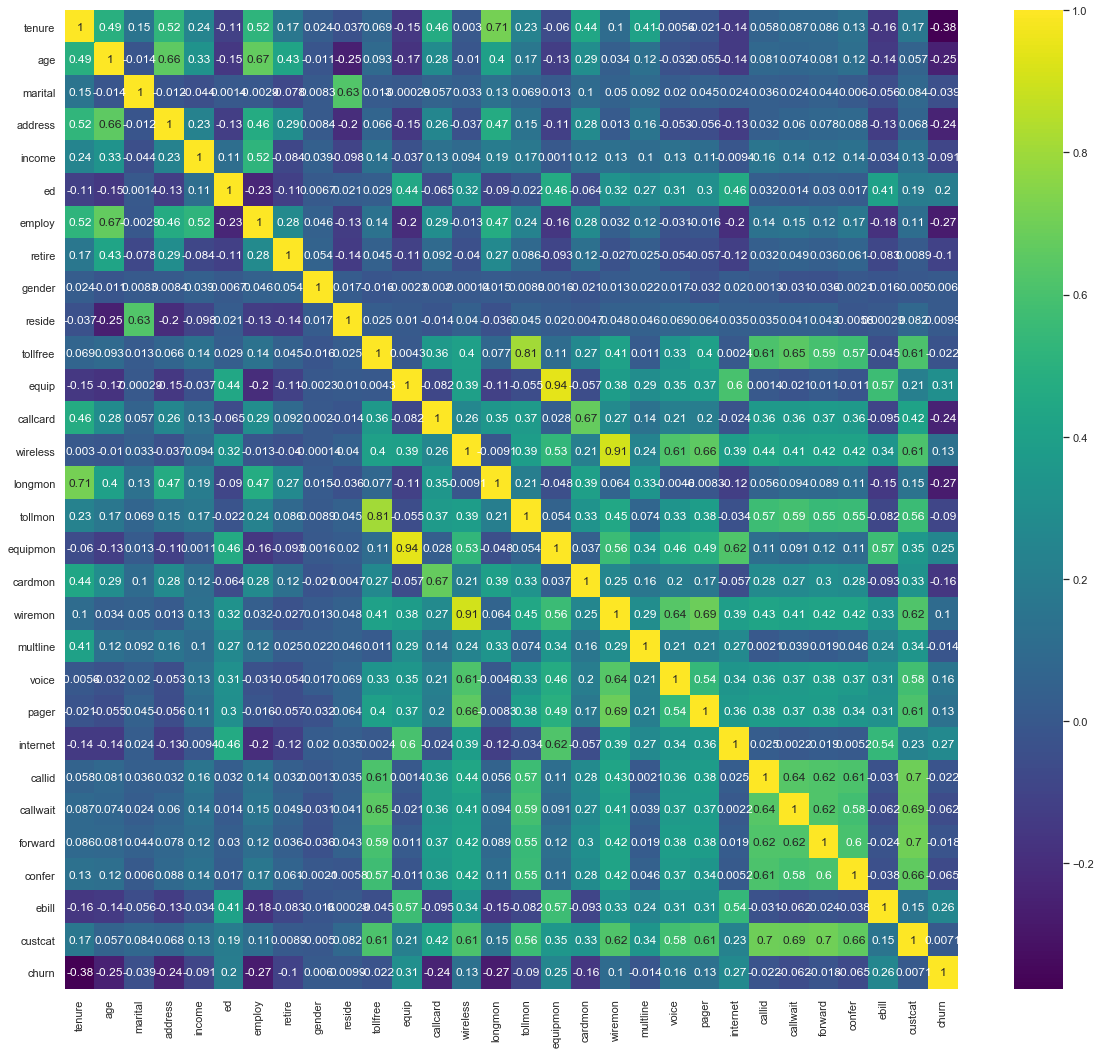

In [26]:
plt.figure(figsize=(20,18))
sns.heatmap(df_corr,annot=True,cmap ="viridis")
            #xticklabels=df_corr.columns,yticklabels=df_corr.columns)

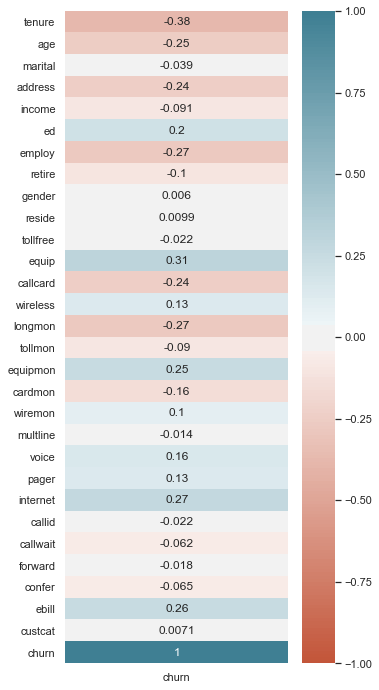

In [27]:
churn_corr = df.corr()
churn_corr = churn_corr[['churn']]
plt.figure(figsize=(5,12))
sns.heatmap(churn_corr, annot = True, vmin=-1, vmax=1,cmap=sns.diverging_palette(20, 220, n=200))

#### Conclusion: After analyzing data set , we can conclude that is no features which is highly correlated with Churn. Some of the feature having positive and negative correlation with churn but in a small number.


# Step 4 : X & Y Split and sampling (Train and Test)
### X contain all independent varibale
### y contain target variable

In [28]:
X=df.drop(['churn',"Customer ID"],axis=1)
y=df.churn
print(X.shape)
print(y.shape)

(1000, 29)
(1000,)


In [29]:
df.isnull().sum()

Customer ID    0
tenure         0
age            0
marital        0
address        0
income         0
ed             0
employ         0
retire         0
gender         0
reside         0
tollfree       0
equip          0
callcard       0
wireless       0
longmon        0
tollmon        0
equipmon       0
cardmon        0
wiremon        0
multline       0
voice          0
pager          0
internet       0
callid         0
callwait       0
forward        0
confer         0
ebill          0
custcat        0
churn          0
dtype: int64

### Sampling (Dividing data in train & test in 70:30 ratio)

In [30]:
import sklearn
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [32]:
print("X_train",X_train.shape)
print("X_test", X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (700, 29)
X_test (300, 29)
y_train (700,)
y_test (300,)


In [33]:
#conda update scikit-learn

# Step 5:  Model Building

### Necessary imports

In [34]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [35]:
#pip install cython

### Creating instances for classifiers

In [36]:
logmodel1= LogisticRegression()
dtree1 = DecisionTreeClassifier()
rfc1 = RandomForestClassifier()
naive_bay1= MultinomialNB()
svc_model1= SVC()
abc1 = AdaBoostClassifier (DecisionTreeClassifier(), n_estimators = 15)

### Train the models

In [37]:
logmodel1.fit(X_train, y_train)
dtree1.fit(X_train, y_train)
rfc1.fit(X_train, y_train)
naive_bay1.fit(X_train, y_train)
svc_model1.fit(X_train, y_train)
abc1.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=15)

### Predict on Test data

In [38]:
pred1 = logmodel1.predict(X_test)
pred1_dt = dtree1.predict(X_test)
pred1_rfc = rfc1.predict(X_test)
pred1_nb =naive_bay1.predict(X_test)
pred1_svc = svc_model1.predict(X_test)
pred1_abc = abc1.predict(X_test)

###  Step 6 : Compare Confusion Matrices of all the above models

In [39]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [40]:
cf_logi = confusion_matrix(y_test,pred1)
cf_dt= confusion_matrix(y_test,pred1_dt)
cf_rfc = confusion_matrix(y_test,pred1_rfc)
cf_nb= confusion_matrix(y_test,pred1_nb)
cf_svc= confusion_matrix(y_test,pred1_svc)
cf_abc = confusion_matrix(y_test,pred1_abc)

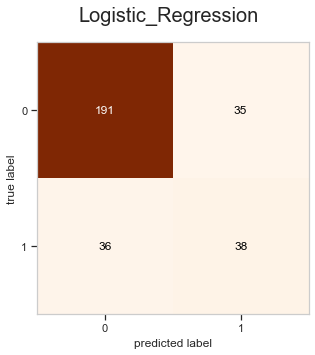

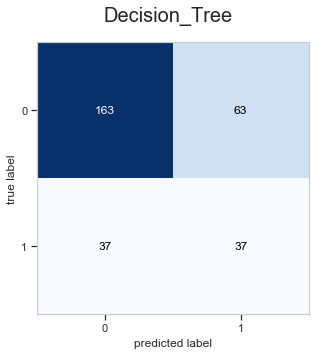

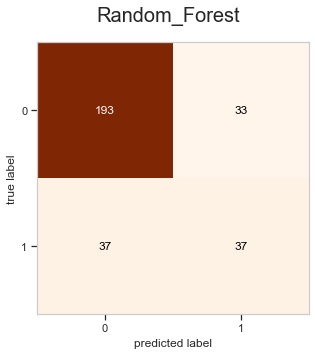

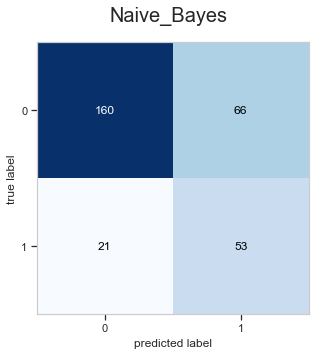

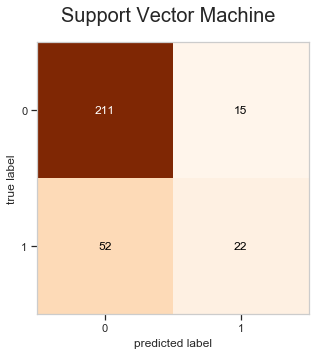

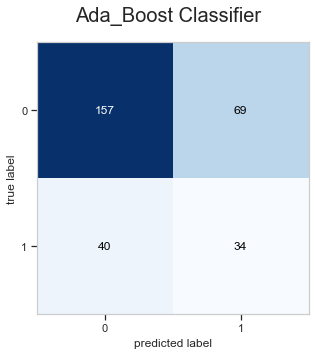

In [41]:
binary1 = np.array(cf_logi)
binary2 = np.array(cf_dt)
binary3 = np.array(cf_rfc)
binary4 = np.array(cf_nb)
binary5 = np.array(cf_svc)
binary6 = np.array(cf_abc)

fig, ax = plot_confusion_matrix(conf_mat=binary1,figsize=(5, 5),cmap='Oranges')
plt.suptitle('Logistic_Regression' ,fontsize= 20)
fig, ax1 = plot_confusion_matrix(conf_mat=binary2,figsize=(5, 5))
plt.suptitle('Decision_Tree' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary3,figsize=(5, 5),cmap='Oranges')
plt.suptitle('Random_Forest' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary4,figsize=(5, 5))
plt.suptitle('Naive_Bayes' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary5,figsize=(5, 5),cmap='Oranges')
plt.suptitle('Support Vector Machine' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary6,figsize=(5, 5))
plt.suptitle('Ada_Boost Classifier' ,fontsize= 20)
plt.show()

# Step 7 : Evaluate all models

###  Accuracy scores

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
Acc1_logmodel1 = accuracy_score(y_test, pred1)
Acc1_dt1 = accuracy_score(y_test, pred1_dt)
Acc1_rfc1 = accuracy_score(y_test, pred1_rfc)
Acc1_nb1 = accuracy_score(y_test, pred1_nb)
Acc1_svc1 = accuracy_score(y_test, pred1_svc)
Acc1_boost1 = accuracy_score(y_test, pred1_abc)
AccuracyScores1 = [Acc1_logmodel1,Acc1_dt1,Acc1_rfc1,Acc1_nb1,Acc1_svc1,Acc1_boost1]
print (AccuracyScores1)

[0.7633333333333333, 0.6666666666666666, 0.7666666666666667, 0.71, 0.7766666666666666, 0.6366666666666667]


###  Precision Scores

In [44]:
from sklearn.metrics import precision_score

In [45]:
Prec1_logmodel1 = precision_score(y_test, pred1)
Prec1_dt1 = precision_score(y_test, pred1_dt)
Prec1_rfc1 = precision_score(y_test, pred1_rfc)
Prec1_nb1 = precision_score(y_test, pred1_nb)
Prec1_svc1 = precision_score(y_test, pred1_svc)
Prec1_boost1 = precision_score(y_test, pred1_abc)
PrecisionScores1 = [Prec1_logmodel1,Prec1_dt1,Prec1_rfc1,Prec1_nb1,Prec1_svc1,Prec1_boost1]
print (PrecisionScores1)

[0.5205479452054794, 0.37, 0.5285714285714286, 0.44537815126050423, 0.5945945945945946, 0.3300970873786408]


###  Recall / Sensitivity

In [46]:
from sklearn.metrics import recall_score

In [47]:
Rec1_logmodel1 = recall_score(y_test, pred1)
Rec1_dt1 = recall_score(y_test, pred1_dt)
Rec1_rfc1 = recall_score(y_test, pred1_rfc)
Rec1_nb1 = recall_score(y_test, pred1_nb)
Rec1_svc1 = recall_score(y_test, pred1_svc)
Rec1_boost1 = recall_score(y_test, pred1_abc)
Recall_Sensitivity1 = [Rec1_logmodel1,Rec1_dt1,Rec1_rfc1,Rec1_nb1,Rec1_svc1,Rec1_boost1]
print (Recall_Sensitivity1)

[0.5135135135135135, 0.5, 0.5, 0.7162162162162162, 0.2972972972972973, 0.4594594594594595]


###  Specificity (Recall of Negative class or class "0")

In [48]:
spec1_logmodel1 = recall_score(y_test, pred1,pos_label=0)
spec1_dt1 = recall_score(y_test, pred1_dt,pos_label=0)
spec1_rfc1 = recall_score(y_test, pred1_rfc,pos_label=0)
spec1_nb1 = recall_score(y_test, pred1_nb,pos_label=0)
spec1_svc1 = recall_score(y_test, pred1_svc,pos_label=0)
spec1_boost1 = recall_score(y_test, pred1_abc,pos_label=0)
specificity1 = [spec1_logmodel1,spec1_dt1,spec1_rfc1,spec1_nb1,spec1_svc1,spec1_boost1]
print (specificity1)

[0.8451327433628318, 0.7212389380530974, 0.8539823008849557, 0.7079646017699115, 0.9336283185840708, 0.6946902654867256]


###  Kappa Value

In [49]:
from sklearn.metrics import cohen_kappa_score

In [50]:
kappa1_logmodel1 = cohen_kappa_score(y_test, pred1)
kappa1_dt1 = cohen_kappa_score(y_test, pred1_dt)
kappa1_rfc1 = cohen_kappa_score(y_test, pred1_rfc)
kappa1_nb1 = cohen_kappa_score(y_test, pred1_nb)
kappa1_svc1 = cohen_kappa_score(y_test, pred1_svc)
kappa1_boost1 = cohen_kappa_score(y_test, pred1_abc)
Kappa_Value1= [kappa1_logmodel1,kappa1_dt1,kappa1_rfc1,kappa1_nb1,kappa1_svc1,kappa1_boost1]
print (Kappa_Value1)

[0.3602835175396444, 0.19786096256684482, 0.36053593179049936, 0.35216441620333594, 0.2776020701552616, 0.13620033812341503]


## Step 8 : Feature Selection

In [51]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
!pip install boruta
from boruta import BorutaPy
from sklearn.feature_selection import RFE

### Select-K-Best

In [52]:
test= SelectKBest(score_func=chi2,k=10)

fitted_cr = test.fit(emp_data_x, emp_data_y)

In [53]:
fitted_scr = test.fit(X, y)
df3 = pd.DataFrame({"Feauture": X.columns, "Select-K-Best Score": fitted_scr.scores_})
df3

,Feauture,Select-K-Best Score
0,tenure,1821.802910
1,age,241.608178
2,marital,0.756361
3,address,519.891713
4,income,1231.706013
5,ed,23.250195
6,employ,694.966472
7,retire,10.436455
8,gender,0.017512
9,reside,0.085759


###  Boruta

In [54]:
X1 = np.array(X)
y1 = np.array(y)
rf = RandomForestClassifier()
boruta_feature_selector = BorutaPy(rf, random_state = 111, max_iter = 25, perc = 100, verbose = 2)
boruta_feature_selector.fit(X1, y1)

df4 = pd.DataFrame({"Column name": X.columns, "Feature": boruta_feature_selector.support_})
df4

Iteration: 	1 / 25
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	2 / 25
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	3 / 25
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	4 / 25
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	5 / 25
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	6 / 25
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	7 / 25
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	8 / 25
Confirmed: 	3
Tentative: 	3
Rejected: 	23
Iteration: 	9 / 25
Confirmed: 	3
Tentative: 	3
Rejected: 	23
Iteration: 	10 / 25
Confirmed: 	3
Tentative: 	3
Rejected: 	23
Iteration: 	11 / 25
Confirmed: 	3
Tentative: 	3
Rejected: 	23
Iteration: 	12 / 25
Confirmed: 	3
Tentative: 	3
Rejected: 	23
Iteration: 	13 / 25
Confirmed: 	3
Tentative: 	3
Rejected: 	23
Iteration: 	14 / 25
Confirmed: 	3
Tentative: 	3
Rejected: 	23
Iteration: 	15 / 25
Confirmed: 	3
Tentative: 	3
Rejected: 	23
Iteration: 	16 / 25
Confirmed: 	3
Tentative: 	3
Rejected: 	23
Iteration: 	17 / 

,Column name,Feature
0,tenure,True
1,age,False
2,marital,False
3,address,False
4,income,False
5,ed,False
6,employ,False
7,retire,False
8,gender,False
9,reside,False


###  Recursive Feature Selection (RFE)

In [55]:
rfc = RandomForestClassifier()
rfe_rfc = RFE(rfc, 10) #...top 5 important feature
rfe_rfc.fit(X, y)
df5 = pd.DataFrame({"Column name": X.columns, "Feature": rfe_rfc.support_})
df5

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


,Column name,Feature
0,tenure,True
1,age,True
2,marital,False
3,address,True
4,income,True
5,ed,True
6,employ,True
7,retire,False
8,gender,False
9,reside,False


### Feature Importance by Decision Tree

In [56]:
dtree_fi = DecisionTreeClassifier()
dtree_fi.fit(X, y)
df6 = pd.DataFrame({"Feauture": X.columns, "Importance": dtree_fi.feature_importances_})
df6

,Feauture,Importance
0,tenure,0.185366
1,age,0.076490
2,marital,0.001955
3,address,0.054378
4,income,0.083423
5,ed,0.026540
6,employ,0.067453
7,retire,0.000000
8,gender,0.017874
9,reside,0.016547


###  Feature Importance by Random Forest

In [57]:
rfc_fi = RandomForestClassifier()
rfc_fi.fit(X, y)
df7 = pd.DataFrame({"Feauture": X.columns, "Importance": rfc_fi.feature_importances_})
df7

,Feauture,Importance
0,tenure,0.125879
1,age,0.075862
2,marital,0.012930
3,address,0.070976
4,income,0.072359
5,ed,0.032853
6,employ,0.064956
7,retire,0.001766
8,gender,0.015644
9,reside,0.027377


###  Selection of Features

In [58]:
Feature_selection = pd.DataFrame({"Feauture": X.columns, "Select-K-Best Score": fitted_scr.scores_,
                                  "Importance(Decision Tree)": dtree1.feature_importances_, "Importance (RandomForest)": rfc1.feature_importances_,
                                 "Boruta-Support": boruta_feature_selector.support_,"RFE-Support": rfe_rfc.support_ })
Feature_selection=Feature_selection.sort_values(by=['Select-K-Best Score'], ascending=False)
cm = sns.light_palette("orange", as_cmap=True)
Feature_selection1 =  Feature_selection.style.background_gradient(cmap=cm)
Feature_selection1

,Feauture,Select-K-Best Score,Importance(Decision Tree),Importance (RandomForest),Boruta-Support,RFE-Support
0,tenure,1821.802910,0.203789,0.126667,True,True
16,equipmon,1643.642650,0.032627,0.052082,True,True
4,income,1231.706013,0.053520,0.066540,False,True
6,employ,694.966472,0.037237,0.062749,False,True
14,longmon,678.983209,0.135430,0.097113,True,True
3,address,519.891713,0.062215,0.069611,False,True
17,cardmon,354.094908,0.101075,0.062015,False,True
18,wiremon,332.227673,0.030979,0.030187,False,False
1,age,241.608178,0.061678,0.083191,False,True
15,tollmon,174.641626,0.016917,0.035225,False,True


From Feature Selection analyis below features are important parameters
1. Tenure	
2. Equipmon	
3. Income	
4. Employ	
5. Longmon	
6. Address	
7. Cardmon	
8. Wiremon	
9. Age	
10. Tollmon	
11.	Equip	
12.	Internet	
13.	Ebill	

### Step 9 :Comparing Model

In [59]:
Names = ["LogisticReg1","DecisionTree1","RandomForest1","NaiveByes1","SVM1","Boosting1"]

In [60]:
df = pd.DataFrame(list(zip(Names, AccuracyScores1,PrecisionScores1,Recall_Sensitivity1,specificity1, Kappa_Value1)), 
               columns =['Model_Name', 'Accuracy', 'Precision',"Recall/Sensitivity",'specificity', "Kappa_Value"]) 
df2 =df.sort_values(by=['Accuracy'], ascending=False)
cm = sns.light_palette("blue", as_cmap=True)
Model_comparison_1 = df2.style.background_gradient(cmap=cm)
Model_comparison_1

,Model_Name,Accuracy,Precision,Recall/Sensitivity,specificity,Kappa_Value
4,SVM1,0.776667,0.594595,0.297297,0.933628,0.277602
2,RandomForest1,0.766667,0.528571,0.500000,0.853982,0.360536
0,LogisticReg1,0.763333,0.520548,0.513514,0.845133,0.360284
3,NaiveByes1,0.710000,0.445378,0.716216,0.707965,0.352164
1,DecisionTree1,0.666667,0.370000,0.500000,0.721239,0.197861
5,Boosting1,0.636667,0.330097,0.459459,0.694690,0.136200


### From above model comparison it oberved that Random Forest is best suitable for our use case with below metric scores

## Selected Model:  Random Forest 

### Accuracy: 78 %

### Recall / Sensitivity: 52 %   (Ability to correctly predict all positives)

### Specificity : 87 % (Ability to correctly predict all negative ,means customer less having churn)

### Kappa value : 0.40

### Step 10 : Lift Chart

In [61]:
#!pip install scikit-plot

In [62]:
predicted_probas = rfc1.predict_proba(X_test)


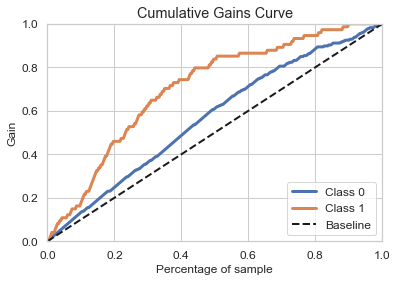

In [63]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

In [64]:
print(predicted_probas)

[[0.57 0.43]
 [0.76 0.24]
 [0.95 0.05]
 [0.81 0.19]
 [0.46 0.54]
 [0.93 0.07]
 [0.9  0.1 ]
 [0.65 0.35]
 [0.73 0.27]
 [0.58 0.42]
 [0.86 0.14]
 [0.83 0.17]
 [0.96 0.04]
 [0.82 0.18]
 [0.59 0.41]
 [0.38 0.62]
 [0.73 0.27]
 [0.56 0.44]
 [0.81 0.19]
 [0.78 0.22]
 [0.3  0.7 ]
 [0.28 0.72]
 [0.61 0.39]
 [0.94 0.06]
 [0.5  0.5 ]
 [0.95 0.05]
 [0.38 0.62]
 [0.67 0.33]
 [0.8  0.2 ]
 [0.51 0.49]
 [0.7  0.3 ]
 [0.99 0.01]
 [0.68 0.32]
 [0.77 0.23]
 [0.58 0.42]
 [0.94 0.06]
 [0.2  0.8 ]
 [0.64 0.36]
 [0.62 0.38]
 [0.92 0.08]
 [0.71 0.29]
 [0.66 0.34]
 [0.97 0.03]
 [0.92 0.08]
 [0.38 0.62]
 [0.24 0.76]
 [0.72 0.28]
 [0.84 0.16]
 [0.56 0.44]
 [0.79 0.21]
 [0.43 0.57]
 [0.47 0.53]
 [0.77 0.23]
 [0.79 0.21]
 [0.51 0.49]
 [0.56 0.44]
 [0.32 0.68]
 [0.93 0.07]
 [0.92 0.08]
 [0.75 0.25]
 [0.19 0.81]
 [0.95 0.05]
 [0.79 0.21]
 [0.97 0.03]
 [0.9  0.1 ]
 [0.31 0.69]
 [0.87 0.13]
 [0.8  0.2 ]
 [0.45 0.55]
 [0.41 0.59]
 [0.97 0.03]
 [0.33 0.67]
 [0.47 0.53]
 [0.69 0.31]
 [0.61 0.39]
 [0.32 0.68]
 [0.76 0.24]

# Section 2

In [65]:
df = pd.read_csv(r"C:\Users\hp\Desktop\Assingment\Churn1.csv")
df_new = df.copy()

In [66]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  1000 non-null   object 
 1   tenure       1000 non-null   int64  
 2   age          1000 non-null   int64  
 3   marital      1000 non-null   int64  
 4   address      1000 non-null   int64  
 5   income       1000 non-null   int64  
 6   ed           1000 non-null   int64  
 7   employ       1000 non-null   int64  
 8   retire       1000 non-null   int64  
 9   gender       1000 non-null   int64  
 10  reside       1000 non-null   int64  
 11  tollfree     1000 non-null   int64  
 12  equip        1000 non-null   int64  
 13  callcard     1000 non-null   int64  
 14  wireless     1000 non-null   int64  
 15  longmon      1000 non-null   float64
 16  tollmon      1000 non-null   float64
 17  equipmon     1000 non-null   float64
 18  cardmon      1000 non-null   float64
 19  wiremon

In [67]:
df_new.ed.replace({1:"Below High school",2:"High school degree",3:"Some college",
                  4:"College Degree",5:"Post UG Degree"}, inplace = True)
df_new.custcat.replace({1:"basic service",2:"e-service",3:"plus service",4:"total service"}, inplace = True) 

#Customer education (1=did not complete high schooll; 2= High school degree or GED; 3=Some college; 4=College degree; 5=Post UG degree)
#Customer category (1=basic service; 2= e-service; 3=plus service; 4=total service)


In [68]:
#df_new["ed"]=df_new['ed'].astype(object)
#df_new["custcat"] = df_new["custcat"].astype(object)

In [69]:
dummies = pd.get_dummies(df_new[["ed","custcat"]])
df_new = pd.concat([df_new.drop(["ed","custcat"],axis =1),dummies],axis =1)



In [70]:
df_new.head()

,Customer ID,tenure,age,marital,address,income,employ,retire,gender,reside,...,churn,ed_Below High school,ed_College Degree,ed_High school degree,ed_Post UG Degree,ed_Some college,custcat_basic service,custcat_e-service,custcat_plus service,custcat_total service
0,CS01,13,44,1,9,64,5,0,0,2,...,1,0,1,0,0,0,1,0,0,0
1,CS02,11,33,1,7,136,5,0,0,6,...,1,0,0,0,1,0,0,0,0,1
2,CS03,68,52,1,24,116,29,0,1,2,...,0,1,0,0,0,0,0,0,1,0
3,CS04,33,33,0,12,33,0,0,1,1,...,1,0,0,1,0,0,1,0,0,0
4,CS05,23,30,1,9,30,2,0,0,4,...,0,1,0,0,0,0,0,0,1,0


In [71]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer ID            1000 non-null   object 
 1   tenure                 1000 non-null   int64  
 2   age                    1000 non-null   int64  
 3   marital                1000 non-null   int64  
 4   address                1000 non-null   int64  
 5   income                 1000 non-null   int64  
 6   employ                 1000 non-null   int64  
 7   retire                 1000 non-null   int64  
 8   gender                 1000 non-null   int64  
 9   reside                 1000 non-null   int64  
 10  tollfree               1000 non-null   int64  
 11  equip                  1000 non-null   int64  
 12  callcard               1000 non-null   int64  
 13  wireless               1000 non-null   int64  
 14  longmon                1000 non-null   float64
 15  tollm

In [72]:
X_new=df_new.drop(['churn',"Customer ID"],axis=1)
y_new=df_new.churn
print(X_new.shape)
print(y_new.shape)

(1000, 36)
(1000,)


In [73]:
X_new.columns

Index(['tenure', 'age', 'marital', 'address', 'income', 'employ', 'retire',
       'gender', 'reside', 'tollfree', 'equip', 'callcard', 'wireless',
       'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'multline',
       'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer',
       'ebill', 'ed_Below High school', 'ed_College Degree',
       'ed_High school degree', 'ed_Post UG Degree', 'ed_Some college',
       'custcat_basic service', 'custcat_e-service', 'custcat_plus service',
       'custcat_total service'],
      dtype='object')

In [74]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.30, random_state=101)

In [75]:
print("X_train",X_new_train.shape)
print("X_test", X_new_test.shape)
print("y_train",y_new_train.shape)
print("y_test",y_new_test.shape)

X_train (700, 36)
X_test (300, 36)
y_train (700,)
y_test (300,)


In [76]:
logmodel2= LogisticRegression()
dtree2 = DecisionTreeClassifier()
rfc2 = RandomForestClassifier()
naive_bay2= MultinomialNB()
svc_model2= SVC()
abc2 = AdaBoostClassifier (DecisionTreeClassifier(), n_estimators = 15)

In [77]:
logmodel2.fit(X_new_train, y_new_train)
dtree2.fit(X_new_train, y_new_train)
rfc2.fit(X_new_train, y_new_train)
naive_bay2.fit(X_new_train, y_new_train)
svc_model2.fit(X_new_train, y_new_train)
abc2.fit(X_new_train, y_new_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=15)

In [78]:
pred2 = logmodel2.predict(X_new_test)
pred2_dt = dtree2.predict(X_new_test)
pred2_rfc = rfc2.predict(X_new_test)
pred2_nb =naive_bay2.predict(X_new_test)
pred2_svc = svc_model2.predict(X_new_test)
pred2_abc = abc2.predict(X_new_test)

In [79]:
cf_logi2 = confusion_matrix(y_new_test,pred2)
cf_dt2 = confusion_matrix(y_new_test,pred2_dt)
cf_rfc2 = confusion_matrix(y_new_test,pred2_rfc)
cf_nb2 = confusion_matrix(y_new_test,pred2_nb)
cf_svc2 = confusion_matrix(y_new_test,pred2_svc)
cf_abc2 = confusion_matrix(y_new_test,pred2_abc)

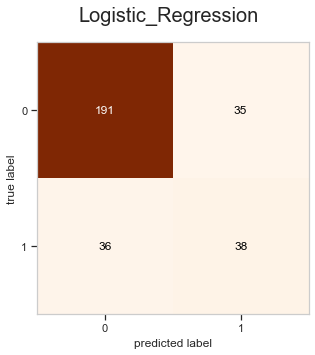

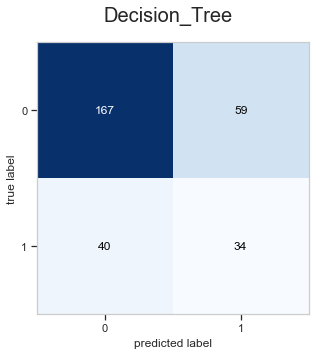

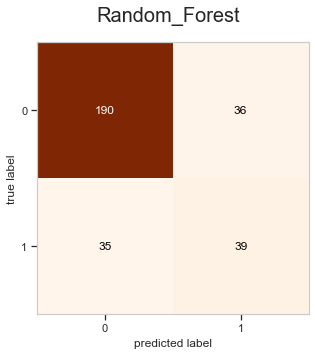

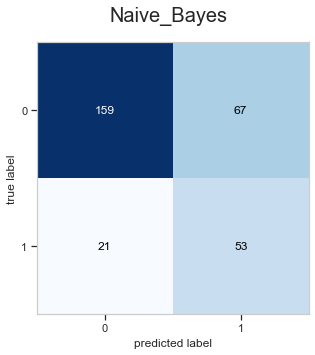

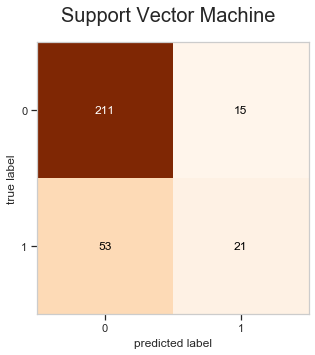

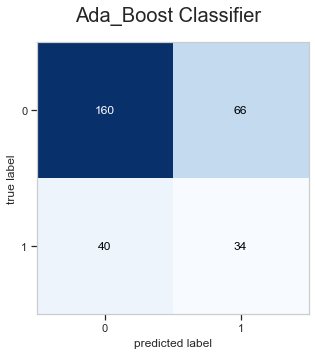

In [80]:
binary_log = np.array(cf_logi2)
binary_dt = np.array(cf_dt2)
binary_rfc = np.array(cf_rfc2)
binary_nb = np.array(cf_nb2)
binary_svc = np.array(cf_svc2)
binary_abc = np.array(cf_abc2)

fig, ax = plot_confusion_matrix(conf_mat=binary_log,figsize=(5, 5),cmap='Oranges')
plt.suptitle('Logistic_Regression' ,fontsize= 20)
fig, ax1 = plot_confusion_matrix(conf_mat=binary_dt,figsize=(5, 5))
plt.suptitle('Decision_Tree' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary_rfc,figsize=(5, 5),cmap='Oranges')
plt.suptitle('Random_Forest' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary_nb,figsize=(5, 5))
plt.suptitle('Naive_Bayes' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary_svc,figsize=(5, 5),cmap='Oranges')
plt.suptitle('Support Vector Machine' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary_abc,figsize=(5, 5))
plt.suptitle('Ada_Boost Classifier' ,fontsize= 20)
plt.show()

In [81]:
Acc_logmodel1 = accuracy_score(y_new_test, pred2)
Acc_dt1 = accuracy_score(y_new_test, pred2_dt)
Acc_rfc1 = accuracy_score(y_new_test, pred2_rfc)
Acc_nb1 = accuracy_score(y_new_test, pred2_nb)
Acc_svc1 = accuracy_score(y_new_test, pred2_svc)
Acc_boost1 = accuracy_score(y_new_test, pred2_abc)
AccuracyScores2 = [Acc_logmodel1,Acc_dt1,Acc_rfc1,Acc_nb1,Acc_svc1,Acc_boost1]
print (AccuracyScores2)

Prec_logmodel1 = precision_score(y_new_test, pred2)
Prec_dt1 = precision_score(y_new_test, pred2_dt)
Prec_rfc1 = precision_score(y_new_test, pred2_rfc)
Prec_nb1 = precision_score(y_new_test, pred2_nb)
Prec_svc1 = precision_score(y_new_test, pred2_svc)
Prec_boost1 = precision_score(y_new_test, pred2_abc)
PrecisionScores2 = [Prec_logmodel1,Prec_dt1,Prec_rfc1,Prec_nb1,Prec_svc1,Prec_boost1]
print (PrecisionScores2)

Rec_logmodel1 = recall_score(y_new_test, pred2)
Rec_dt1 = recall_score(y_new_test, pred2_dt)
Rec_rfc1 = recall_score(y_new_test, pred2_rfc)
Rec_nb1 = recall_score(y_new_test, pred2_nb)
Rec_svc1 = recall_score(y_new_test, pred2_svc)
Rec_boost1 = recall_score(y_new_test, pred2_abc)
Recall_Sensitivity2 = [Rec_logmodel1,Rec_dt1,Rec_rfc1,Rec_nb1,Rec_svc1,Rec_boost1]
print (Recall_Sensitivity2)

spec_logmodel1 = recall_score(y_new_test, pred2,pos_label=0)
spec_dt1 = recall_score(y_new_test, pred2_dt,pos_label=0)
spec_rfc1 = recall_score(y_new_test, pred2_rfc,pos_label=0)
spec_nb1 = recall_score(y_new_test, pred2_nb,pos_label=0)
spec_svc1 = recall_score(y_new_test, pred2_svc,pos_label=0)
spec_boost1 = recall_score(y_new_test, pred2_abc,pos_label=0)
specificity2 = [spec_logmodel1,spec_dt1,spec_rfc1,spec_nb1,spec_svc1,spec_boost1]
print (specificity2)

kappa_logmodel1 = cohen_kappa_score(y_new_test, pred2)
kappa_dt1 = cohen_kappa_score(y_new_test, pred2_dt)
kappa_rfc1 = cohen_kappa_score(y_new_test, pred2_rfc)
kappa_nb1 = cohen_kappa_score(y_new_test, pred2_nb)
kappa_svc1 = cohen_kappa_score(y_new_test, pred2_svc)
kappa_boost1 = cohen_kappa_score(y_new_test, pred2_abc)
Kappa_Value2= [kappa_logmodel1,kappa_dt1,kappa_rfc1,kappa_nb1,kappa_svc1,kappa_boost1]
print (Kappa_Value2)



[0.7633333333333333, 0.67, 0.7633333333333333, 0.7066666666666667, 0.7733333333333333, 0.6466666666666666]
[0.5205479452054794, 0.3655913978494624, 0.52, 0.44166666666666665, 0.5833333333333334, 0.34]
[0.5135135135135135, 0.4594594594594595, 0.527027027027027, 0.7162162162162162, 0.28378378378378377, 0.4594594594594595]
[0.8451327433628318, 0.7389380530973452, 0.8407079646017699, 0.7035398230088495, 0.9336283185840708, 0.7079646017699115]
[0.3602835175396444, 0.18262879788639363, 0.3660714285714286, 0.34718100890207726, 0.2627927146574155, 0.14973262032085555]


In [82]:
Names = ["LogisticReg2","DecisionTree2","RandomForest2","NaiveByes2","SVM2","Boosting2"]

In [83]:
df_new1 = pd.DataFrame(list(zip(Names, AccuracyScores2,PrecisionScores2,Recall_Sensitivity2,specificity2, Kappa_Value2)), 
               columns =['Model_Name', 'Accuracy', 'Precision',"Recall/Sensitivity",'specificity', "Kappa_Value"]) 
df2 =df_new1.sort_values(by=['Accuracy'], ascending=False)
cm = sns.light_palette("blue", as_cmap=True)
Model_comparison_2 = df2.style.background_gradient(cmap=cm)
Model_comparison_2

,Model_Name,Accuracy,Precision,Recall/Sensitivity,specificity,Kappa_Value
4,SVM2,0.773333,0.583333,0.283784,0.933628,0.262793
0,LogisticReg2,0.763333,0.520548,0.513514,0.845133,0.360284
2,RandomForest2,0.763333,0.520000,0.527027,0.840708,0.366071
3,NaiveByes2,0.706667,0.441667,0.716216,0.703540,0.347181
1,DecisionTree2,0.670000,0.365591,0.459459,0.738938,0.182629
5,Boosting2,0.646667,0.340000,0.459459,0.707965,0.149733


In [84]:
# Determining top 5 customer 
# this is for 300 customer 
pred_prob = logmodel2.predict_proba(X_new_test)
pred_prob

array([[0.42795083, 0.57204917],
       [0.66446943, 0.33553057],
       [0.9529895 , 0.0470105 ],
       [0.84639281, 0.15360719],
       [0.31975137, 0.68024863],
       [0.94631213, 0.05368787],
       [0.90309707, 0.09690293],
       [0.80619127, 0.19380873],
       [0.49255151, 0.50744849],
       [0.40535504, 0.59464496],
       [0.93669804, 0.06330196],
       [0.8684561 , 0.1315439 ],
       [0.99362497, 0.00637503],
       [0.89307043, 0.10692957],
       [0.63050643, 0.36949357],
       [0.50458241, 0.49541759],
       [0.85615737, 0.14384263],
       [0.70600967, 0.29399033],
       [0.93628658, 0.06371342],
       [0.71735188, 0.28264812],
       [0.17554385, 0.82445615],
       [0.40416655, 0.59583345],
       [0.62042719, 0.37957281],
       [0.96664076, 0.03335924],
       [0.33571757, 0.66428243],
       [0.93414714, 0.06585286],
       [0.54866189, 0.45133811],
       [0.68319436, 0.31680564],
       [0.86914493, 0.13085507],
       [0.65013815, 0.34986185],
       [0.

In [85]:
# Probability for each customer 
pred_prob_full = logmodel2.predict_proba(X_new)
pred_prob_full

array([[0.67126403, 0.32873597],
       [0.71957926, 0.28042074],
       [0.98437397, 0.01562603],
       ...,
       [0.90571758, 0.09428242],
       [0.98037541, 0.01962459],
       [0.68585956, 0.31414044]])

In [86]:
Churn_probability = pd.concat([df_new["Customer ID"], pd.Series(pred_prob_full[:,1])], axis =1)
Churn_probability = Churn_probability.rename(columns = {Churn_probability.columns[1]: "Probility to Churn"})
Churn_probability

,Customer ID,Probility to Churn
0,CS01,0.328736
1,CS02,0.280421
2,CS03,0.015626
3,CS04,0.212359
4,CS05,0.211408
...,...,...
995,CS996,0.584219
996,CS997,0.508249
997,CS998,0.094282
998,CS999,0.019625


In [87]:
# Top 5 Customer 
Churn_probability.sort_values(["Probility to Churn"], ascending=False)

,Customer ID,Probility to Churn
318,CS319,0.882365
953,CS954,0.878281
889,CS890,0.871370
326,CS327,0.867522
679,CS680,0.855809
...,...,...
325,CS326,0.002904
784,CS785,0.002166
67,CS68,0.001919
351,CS352,0.001500


In [88]:
# Details of customer with highest probability to churn
df_new[df_new["Customer ID"].isin(["CS319","CS954","CS890","CS327","CS680"])]

,Customer ID,tenure,age,marital,address,income,employ,retire,gender,reside,...,churn,ed_Below High school,ed_College Degree,ed_High school degree,ed_Post UG Degree,ed_Some college,custcat_basic service,custcat_e-service,custcat_plus service,custcat_total service
318,CS319,3,31,1,4,35,2,0,1,3,...,1,0,0,1,0,0,0,0,0,1
326,CS327,3,25,1,2,45,0,0,1,2,...,1,0,1,0,0,0,1,0,0,0
679,CS680,12,36,1,4,205,10,0,1,4,...,1,0,1,0,0,0,0,1,0,0
889,CS890,22,47,1,0,44,11,0,1,3,...,1,0,1,0,0,0,0,0,0,1
953,CS954,10,23,0,1,29,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1


In [89]:
logmodel2.intercept_

array([0.18677534])

In [90]:
print("coefficient",logmodel2.coef_)

coefficient [[-2.96750251e-02  2.29464952e-03  3.76027824e-01 -3.63077960e-02
   3.06721743e-04 -2.02469507e-02 -2.42010312e-02  7.13966002e-02
  -1.43821725e-01  1.51877571e-01  2.18276658e-01 -7.99602695e-01
  -5.30311347e-02 -3.25510132e-02  3.69881577e-05  4.11749728e-05
   1.91515877e-02  7.92418105e-03  2.97403321e-01  9.30896686e-02
   2.14984079e-01  4.29972905e-01  2.23038945e-01 -2.87752856e-01
   9.46437457e-02 -1.52237779e-01  5.32921283e-01 -2.18320476e-01
   2.85575817e-01  1.11311205e-01  4.71884295e-02 -4.26552144e-02
   1.00303115e-01  1.99642635e-01 -7.42786239e-02 -4.25673661e-02]]


In [91]:
coefficient = pd.DataFrame(logmodel2.coef_ , columns = ['tenure', 'age', 'marital', 'address', 'income', 'employ', 'retire',
       'gender', 'reside', 'tollfree', 'equip', 'callcard', 'wireless',
       'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'multline',
       'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer',
       'ebill', 'ed_Below High school', 'ed_College Degree',
       'ed_High school degree', 'ed_Post UG Degree', 'ed_Some college',
       'custcat_basic service', 'custcat_e-service', 'custcat_plus service',
       'custcat_total service'])

coefficient = coefficient.T
coefficient = coefficient.rename(columns = {coefficient.columns[0]: "Coefficient"})
coefficient

,Coefficient
tenure,-0.029675
age,0.002295
marital,0.376028
address,-0.036308
income,0.000307
employ,-0.020247
retire,-0.024201
gender,0.071397
reside,-0.143822
tollfree,0.151878


### Section 3

### Handling class Imbalance in Train Data

In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
sm = SMOTE()

In [95]:
print("Before OverSampling, counts of label 'Churn_Yes': {}".format(sum(y_new_train == 1))) 
print("Before OverSampling, counts of label 'Churn_No': {} \n".format(sum(y_new_train == 0))) 

X_new_train, y_new_train = sm.fit_sample(X_new_train, y_new_train) 

print('After OverSampling, the shape of X_new_train: {}'.format(X_new_train.shape)) 
print('After OverSampling, the shape of y__new_train: {} \n'.format(y_new_train.shape)) 

print("After OverSampling, counts of label 'Churn_Yes': {}".format(sum(y_new_train == 1))) 
print("After OverSampling, counts of label 'Churn_No': {}".format(sum(y_new_train == 0)))

Before OverSampling, counts of label 'Churn_Yes': 200
Before OverSampling, counts of label 'Churn_No': 500 

After OverSampling, the shape of X_new_train: (1000, 36)
After OverSampling, the shape of y__new_train: (1000,) 

After OverSampling, counts of label 'Churn_Yes': 500
After OverSampling, counts of label 'Churn_No': 500


### Checking for best future

In [96]:
rfc_fi = RandomForestClassifier()
rfc_fi.fit(X_new, y_new)


RandomForestClassifier()

In [97]:
rfe_importance = RFE(rfc_fi , 15)
rfe_importance.fit(X_new, y_new)
rfe_importance.support_

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([ True,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False])

In [98]:
Best_Feature = pd.DataFrame({"Feauture": X_new.columns, "Importance": rfc_fi.feature_importances_, "Impo" : rfe_importance.support_})
Best_Feature

,Feauture,Importance,Impo
0,tenure,0.122078,True
1,age,0.078459,True
2,marital,0.012957,False
3,address,0.070230,True
4,income,0.069587,True
5,employ,0.065642,True
6,retire,0.001237,False
7,gender,0.014816,False
8,reside,0.028988,True
9,tollfree,0.007388,False


In [99]:
rfc_fi.feature_importances_.sum()

1.0

In [100]:
# Details of customer with highest probability to churn
Best_Feature = Best_Feature[Best_Feature["Impo"].isin([True])]
Best_Feature

,Feauture,Importance,Impo
0,tenure,0.122078,True
1,age,0.078459,True
3,address,0.070230,True
4,income,0.069587,True
5,employ,0.065642,True
8,reside,0.028988,True
10,equip,0.026255,True
11,callcard,0.014443,True
13,longmon,0.106467,True
14,tollmon,0.036554,True


### Creating new Data Frame with important features

In [101]:
X_new_train_sort = X_new_train.loc[:,["tenure","age","address","income","employ","reside","equip","callcard","longmon","tollmon","equipmon",
                                  "cardmon","wiremon","internet","ebill"]]
X_new_test_sort = X_new_test.loc[:,["tenure","age","address","income","employ","reside","equip","callcard","longmon","tollmon","equipmon",
                                  "cardmon","wiremon","internet","ebill"]]

In [102]:
print("X_new_train", X_new_train_sort.shape)
print("X_train", X_new_test_sort.shape)

X_new_train (1000, 15)
X_train (300, 15)


### Re-Building Model with important features

In [103]:
# Re Building Model 
logmodel2= LogisticRegression()
dtree2 = DecisionTreeClassifier()
rfc2 = RandomForestClassifier()
naive_bay2= MultinomialNB()
svc_model2= SVC()
abc2 = AdaBoostClassifier (DecisionTreeClassifier(), n_estimators = 15)

logmodel2.fit(X_new_train, y_new_train)
dtree2.fit(X_new_train, y_new_train)
rfc2.fit(X_new_train, y_new_train)
naive_bay2.fit(X_new_train, y_new_train)
svc_model2.fit(X_new_train, y_new_train)
abc2.fit(X_new_train, y_new_train)

pred2 = logmodel2.predict(X_new_test)
pred2_dt = dtree2.predict(X_new_test)
pred2_rfc = rfc2.predict(X_new_test)
pred2_nb =naive_bay2.predict(X_new_test)
pred2_svc = svc_model2.predict(X_new_test)
pred2_abc = abc2.predict(X_new_test)

cf_logi2 = confusion_matrix(y_new_test,pred2)
cf_dt2 = confusion_matrix(y_new_test,pred2_dt)
cf_rfc2 = confusion_matrix(y_new_test,pred2_rfc)
cf_nb2 = confusion_matrix(y_new_test,pred2_nb)
cf_svc2 = confusion_matrix(y_new_test,pred2_svc)
cf_abc2 = confusion_matrix(y_new_test,pred2_abc)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


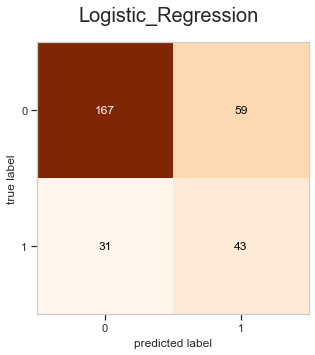

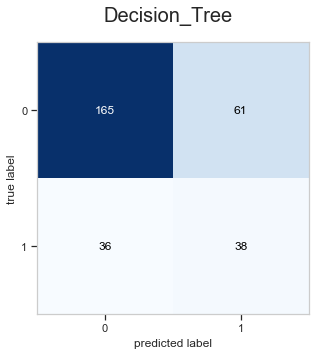

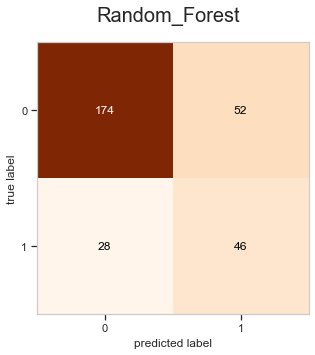

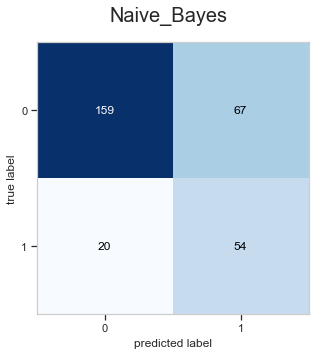

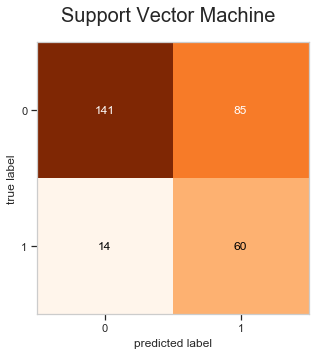

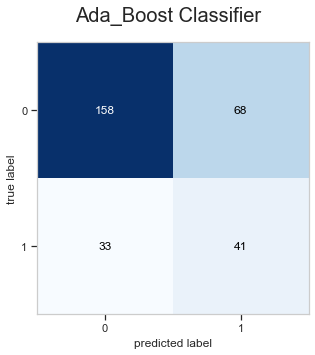

In [104]:
# Plotting Confusion Matrix
binary_log = np.array(cf_logi2)
binary_dt = np.array(cf_dt2)
binary_rfc = np.array(cf_rfc2)
binary_nb = np.array(cf_nb2)
binary_svc = np.array(cf_svc2)
binary_abc = np.array(cf_abc2)

fig, ax = plot_confusion_matrix(conf_mat=binary_log,figsize=(5, 5),cmap='Oranges')
plt.suptitle('Logistic_Regression' ,fontsize= 20)
fig, ax1 = plot_confusion_matrix(conf_mat=binary_dt,figsize=(5, 5))
plt.suptitle('Decision_Tree' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary_rfc,figsize=(5, 5),cmap='Oranges')
plt.suptitle('Random_Forest' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary_nb,figsize=(5, 5))
plt.suptitle('Naive_Bayes' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary_svc,figsize=(5, 5),cmap='Oranges')
plt.suptitle('Support Vector Machine' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary_abc,figsize=(5, 5))
plt.suptitle('Ada_Boost Classifier' ,fontsize= 20)
plt.show()

### Evalaution Matrix

In [105]:
# Evalaution matrix

Acc_logmodel1 = accuracy_score(y_new_test, pred2)
Acc_dt1 = accuracy_score(y_new_test, pred2_dt)
Acc_rfc1 = accuracy_score(y_new_test, pred2_rfc)
Acc_nb1 = accuracy_score(y_new_test, pred2_nb)
Acc_svc1 = accuracy_score(y_new_test, pred2_svc)
Acc_boost1 = accuracy_score(y_new_test, pred2_abc)
AccuracyScores2 = [Acc_logmodel1,Acc_dt1,Acc_rfc1,Acc_nb1,Acc_svc1,Acc_boost1]
print (AccuracyScores2)

Prec_logmodel1 = precision_score(y_new_test, pred2)
Prec_dt1 = precision_score(y_new_test, pred2_dt)
Prec_rfc1 = precision_score(y_new_test, pred2_rfc)
Prec_nb1 = precision_score(y_new_test, pred2_nb)
Prec_svc1 = precision_score(y_new_test, pred2_svc)
Prec_boost1 = precision_score(y_new_test, pred2_abc)
PrecisionScores2 = [Prec_logmodel1,Prec_dt1,Prec_rfc1,Prec_nb1,Prec_svc1,Prec_boost1]
print (PrecisionScores2)

Rec_logmodel1 = recall_score(y_new_test, pred2)
Rec_dt1 = recall_score(y_new_test, pred2_dt)
Rec_rfc1 = recall_score(y_new_test, pred2_rfc)
Rec_nb1 = recall_score(y_new_test, pred2_nb)
Rec_svc1 = recall_score(y_new_test, pred2_svc)
Rec_boost1 = recall_score(y_new_test, pred2_abc)
Recall_Sensitivity2 = [Rec_logmodel1,Rec_dt1,Rec_rfc1,Rec_nb1,Rec_svc1,Rec_boost1]
print (Recall_Sensitivity2)

spec_logmodel1 = recall_score(y_new_test, pred2,pos_label=0)
spec_dt1 = recall_score(y_new_test, pred2_dt,pos_label=0)
spec_rfc1 = recall_score(y_new_test, pred2_rfc,pos_label=0)
spec_nb1 = recall_score(y_new_test, pred2_nb,pos_label=0)
spec_svc1 = recall_score(y_new_test, pred2_svc,pos_label=0)
spec_boost1 = recall_score(y_new_test, pred2_abc,pos_label=0)
specificity2 = [spec_logmodel1,spec_dt1,spec_rfc1,spec_nb1,spec_svc1,spec_boost1]
print (specificity2)

kappa_logmodel1 = cohen_kappa_score(y_new_test, pred2)
kappa_dt1 = cohen_kappa_score(y_new_test, pred2_dt)
kappa_rfc1 = cohen_kappa_score(y_new_test, pred2_rfc)
kappa_nb1 = cohen_kappa_score(y_new_test, pred2_nb)
kappa_svc1 = cohen_kappa_score(y_new_test, pred2_svc)
kappa_boost1 = cohen_kappa_score(y_new_test, pred2_abc)
Kappa_Value2= [kappa_logmodel1,kappa_dt1,kappa_rfc1,kappa_nb1,kappa_svc1,kappa_boost1]
print (Kappa_Value2)



[0.7, 0.6766666666666666, 0.7333333333333333, 0.71, 0.67, 0.6633333333333333]
[0.4215686274509804, 0.3838383838383838, 0.46938775510204084, 0.4462809917355372, 0.41379310344827586, 0.3761467889908257]
[0.581081081081081, 0.5135135135135135, 0.6216216216216216, 0.7297297297297297, 0.8108108108108109, 0.5540540540540541]
[0.7389380530973452, 0.7300884955752213, 0.7699115044247787, 0.7035398230088495, 0.6238938053097345, 0.6991150442477876]
[0.2838956078930618, 0.21875, 0.3530299762777658, 0.357016160819866, 0.3286618444846293, 0.2184275691291787]


### Model Comparison

In [106]:
# Model Comparison

df_new1 = pd.DataFrame(list(zip(Names, AccuracyScores2,PrecisionScores2,Recall_Sensitivity2,specificity2, Kappa_Value2)), 
               columns =['Model_Name', 'Accuracy', 'Precision',"Recall/Sensitivity",'specificity', "Kappa_Value"]) 
df2 =df_new1.sort_values(by=['Accuracy'], ascending=False)
cm = sns.light_palette("blue", as_cmap=True)
Model_comparison_2 = df2.style.background_gradient(cmap=cm)
Model_comparison_2

,Model_Name,Accuracy,Precision,Recall/Sensitivity,specificity,Kappa_Value
2,RandomForest2,0.733333,0.469388,0.621622,0.769912,0.353030
3,NaiveByes2,0.710000,0.446281,0.729730,0.703540,0.357016
0,LogisticReg2,0.700000,0.421569,0.581081,0.738938,0.283896
1,DecisionTree2,0.676667,0.383838,0.513514,0.730088,0.218750
4,SVM2,0.670000,0.413793,0.810811,0.623894,0.328662
5,Boosting2,0.663333,0.376147,0.554054,0.699115,0.218428


### Building model using XGBoost

In [107]:
#pip install xgboost

In [108]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [109]:
xgb_model = XGBClassifier()

n_estimators = [50,100,150,200]
max_depth = [2,3,5]
booster = ["gbtree", "gblinear"]
base_score = [0.2,0.25,0.5,0.75]
learning_rate = [0.1, 0.15,0,20]
min_child_weight = [1,2,3,4]

hyperparameter_grid = {"n_estimators": n_estimators,
                      "max_depth":max_depth,
                      "learning_rate":learning_rate,
                      "min_child_weight":min_child_weight,
                      "booster":booster,
                      "base_score":base_score}

xgb_grid_search_cv = GridSearchCV(xgb_model, hyperparameter_grid,
                                 scoring = "roc_auc", n_jobs = -1, iid = True)

In [110]:
xgb_grid_search_cv.fit(X_new_train, y_new_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             iid

In [111]:
xgb_grid_search_cv.best_estimator_

XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
xgb = XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

xgb_model.fit(X_new_train, y_new_train)
pred_xgb = xgb_model.predict(X_new_test)
cf_xgb = confusion_matrix(y_new_test,pred_xgb)

Text(0.5, 0.98, 'XGBoost')

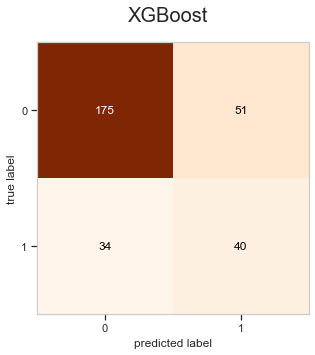

In [113]:
# Plotting confusion matrix
binary_xgb = np.array(cf_xgb)

fig, ax = plot_confusion_matrix(conf_mat=binary_xgb,figsize=(5, 5),cmap='Oranges')
plt.suptitle('XGBoost' ,fontsize= 20)

In [116]:
# Evalaution matrix

Acc_xgbmodel = accuracy_score(y_new_test, pred_xgb)
AccuracyScores = [Acc_xgbmodel]
print(AccuracyScores)

Prec_xgbmodel = precision_score(y_new_test, pred_xgb)
PrecisionScores = [Prec_xgbmodel]
print(PrecisionScores)

Rec_xgbmodel = recall_score(y_new_test, pred_xgb)
Recall_Sensitivity = [Rec_xgbmodel]
print(Recall_Sensitivity)

spec_xgbmodel = recall_score(y_new_test, pred_xgb,pos_label=0)
specificity = [spec_xgbmodel]
print(specificity)

kappa_xgbmodel = cohen_kappa_score(y_new_test, pred_xgb)
Kappa_Value= [kappa_xgbmodel]
print(Kappa_Value)



[0.7166666666666667]
[0.43956043956043955]
[0.5405405405405406]
[0.7743362831858407]
[0.29229573712255763]


In [121]:
Names = ["XGBoost"]
df_xgb = pd.DataFrame(list(zip(Names, AccuracyScores,PrecisionScores,Recall_Sensitivity,specificity, Kappa_Value)), 
               columns =['Model_Name', 'Accuracy', 'Precision',"Recall/Sensitivity",'specificity', "Kappa_Value"]) 
df2_xgb =df_xgb.sort_values(by=['Accuracy'], ascending=False)
cm = sns.light_palette("blue", as_cmap=True)
Result = df2_xgb.style.background_gradient(cmap=cm)
Result

,Model_Name,Accuracy,Precision,Recall/Sensitivity,specificity,Kappa_Value
0,XGBoost,0.716667,0.439560,0.540541,0.774336,0.292296
